<a href="https://colab.research.google.com/github/ZeneS13/F1_Data_Analysis/blob/main/F1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing Libraries



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
file = pd.read_csv("F1DriversDataset.csv")
file.head()
file.columns


Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

# **Driver Nationalities**

In [ ]:
driver_nationalities = file['Nationality'].value_counts().head(20)
def create_bar_chart(labels, values):
    fig = px.bar(x=labels, y=values, labels={'x': 'Nationality', 'y': 'Count'},
                 color=values, color_continuous_scale='Viridis')
    return fig

create_bar_chart(driver_nationalities.index, driver_nationalities.values)

# **Relation between number of seasons and number of wins**

In [ ]:
race_data = file[['Years_Active', 'Race_Wins']]
missing_values = race_data.isnull().sum()

X_features = race_data['Years_Active'].to_numpy().reshape(-1, 1)
y_target = race_data['Race_Wins'].to_numpy().reshape(-1, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor.fit(X_train, y_train)


y_predictions = rf_regressor.predict(X_test)
correlation_coeff = file['Years_Active'].corr(file['Race_Wins'])
mse = mean_squared_error(y_test, y_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Correlation Coefficient: {correlation_coeff}")

Mean Squared Error: 22.450863396834833
Correlation Coefficient: 0.503716776826638


There are other factors that come into play that determine the success beyond the years participated.

# **Race wins and Pole Positions**

In [ ]:
def linear_regression_analysis(file, feature, target):
    X = file[feature].values.reshape(-1, 1)
    y = file[target].values.reshape(-1, 1)

    regressor = LinearRegression()
    regressor.fit(X, y)

    r_squared_value = regressor.score(X, y)
    correlation_value = file[feature].corr(file[target])
    y_pred = regressor.predict(X)
    mse_value = mean_squared_error(y, y_pred)

    # Scatter plot with regression line
    scatter_plot = sns.lmplot(x=feature, y=target, data=file, line_kws={'color': 'purple'})
    scatter_plot.set(title='Race Wins vs Pole Positions')

    return correlation_value, r_squared_value, y_pred, mse_value, scatter_plot


Prediction Score (MSE): 3.7073587803328203
Correlation Coefficient: 0.954951234233677
R-squared Value: 0.9119318597644249


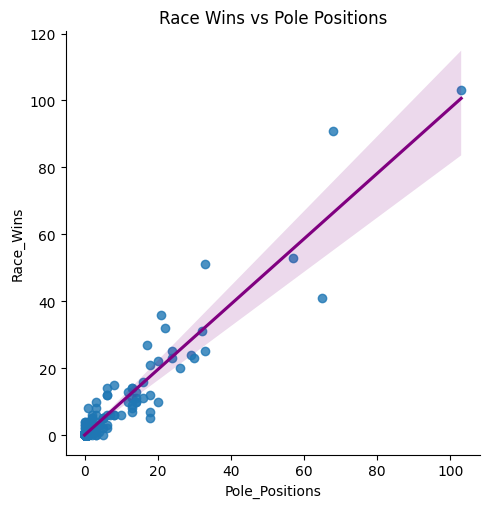

In [ ]:
corr_coef, r_squared, predictions, prediction_score, plot = linear_regression_analysis(file, 'Pole_Positions', 'Race_Wins')

print(f"Prediction Score (MSE): {prediction_score}")
print(f"Correlation Coefficient: {corr_coef}")
print(f"R-squared Value: {r_squared}")

Pole position is a strong predictor of race wins for champions, with higher pole positions typically linked to more race wins.

# **How does one become a Champion**

                  Championships  Race_Entries  Race_Starts  Pole_Positions  \
Championships          1.000000      0.462985     0.471073        0.869342   
Race_Entries           0.462985      1.000000     0.996701        0.582264   
Race_Starts            0.471073      0.996701     1.000000        0.591793   
Pole_Positions         0.869342      0.582264     0.591793        1.000000   
Race_Wins              0.915247      0.590658     0.600889        0.954951   
Podiums                0.808274      0.757007     0.768449        0.901514   
Fastest_Laps           0.829641      0.681107     0.691432        0.899697   
Points                 0.655567      0.689361     0.701817        0.799746   
Decade                 0.105263      0.498214     0.489603        0.181147   
Pole_Rate              0.675121      0.360392     0.367880        0.724572   
Start_Rate             0.101046      0.250540     0.275386        0.122427   
Win_Rate               0.730320      0.391760     0.400482      

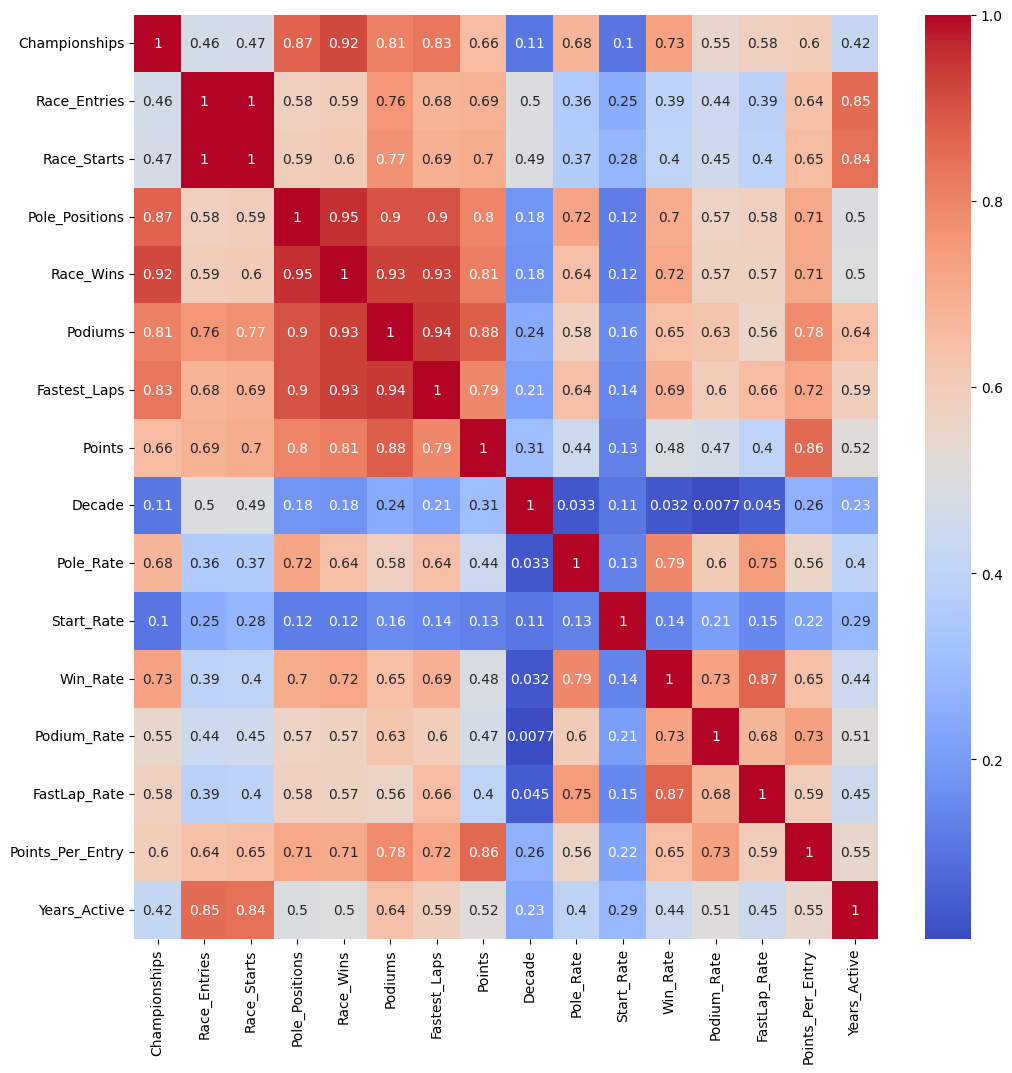

In [ ]:
numerical_features = file.select_dtypes(include=np.number)
print(numerical_features.corr())
plt.figure(figsize=(12,12))
dataplot = sns.heatmap(numerical_features.corr(), cmap="coolwarm", annot=True)
plt.show()

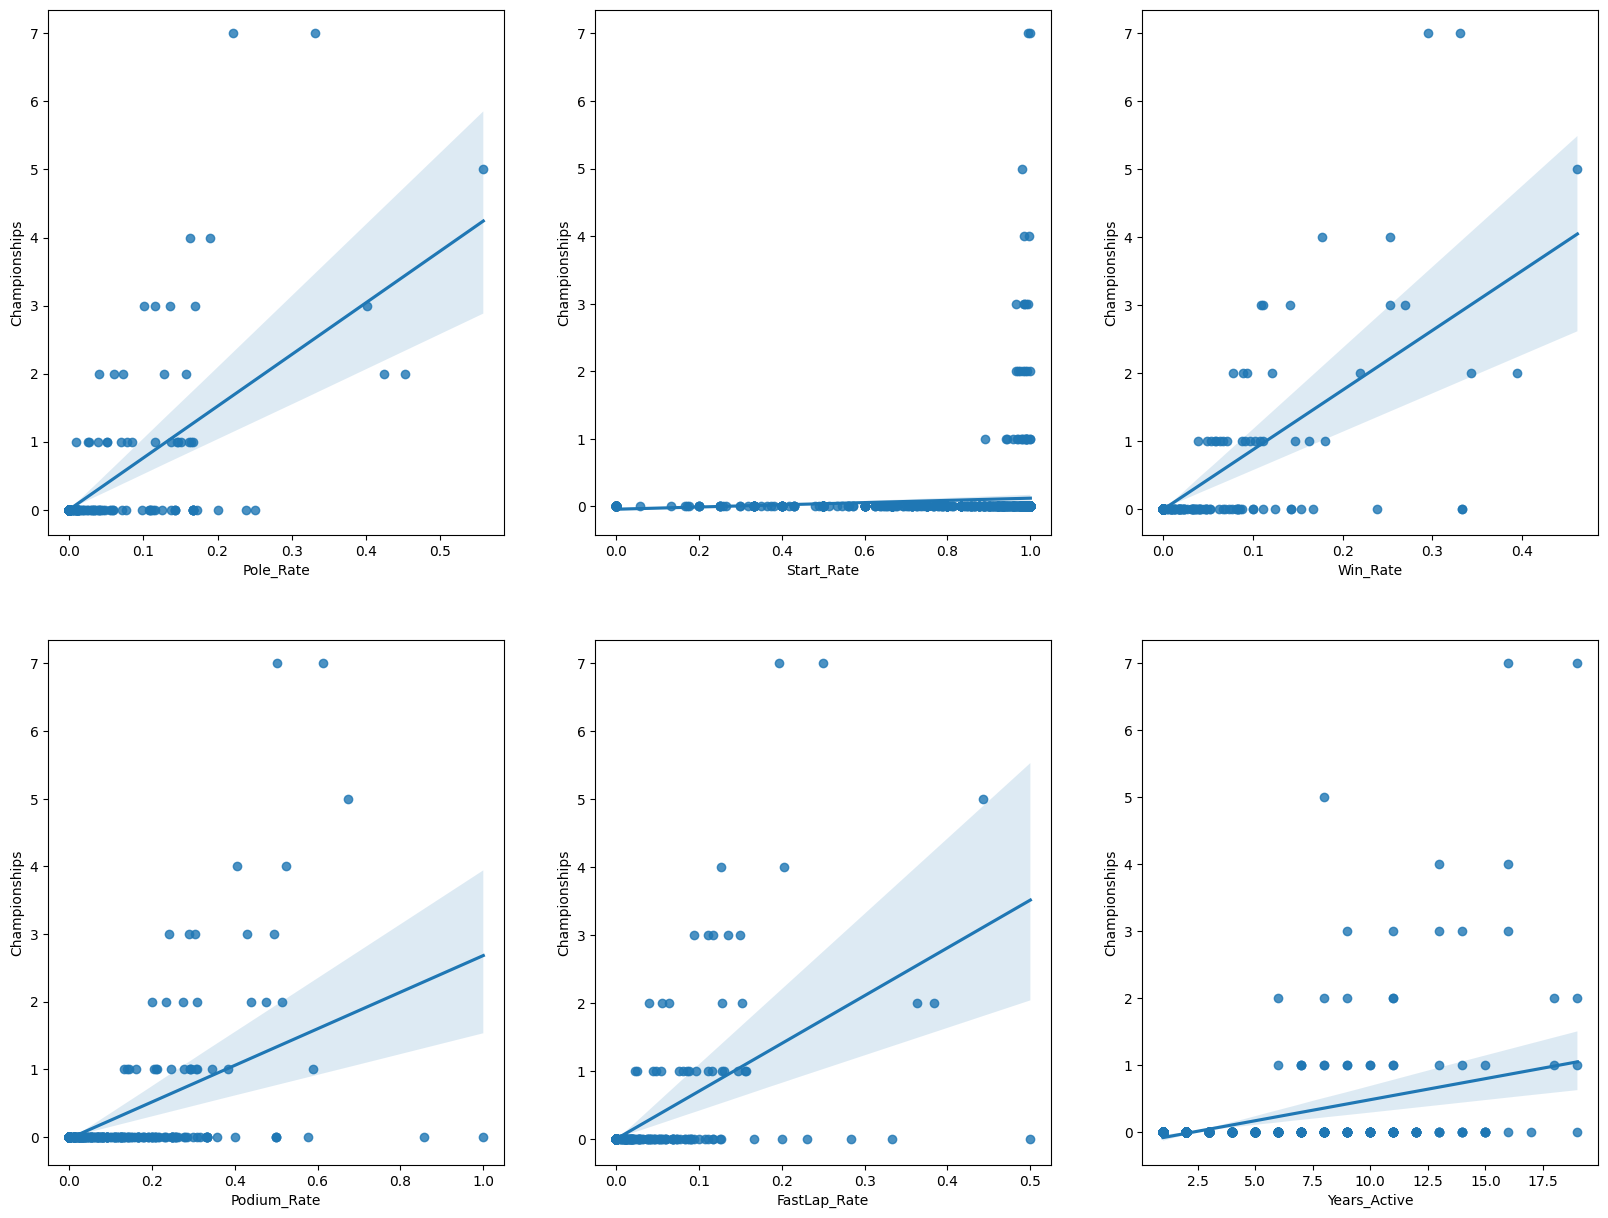

In [ ]:
championship_features = ['Pole_Rate', 'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate', 'Years_Active']
plt.figure(figsize=(20, 15))

for i, feature in enumerate(championship_features, start=1):
    plt.subplot(2, 3, i)
    sns.regplot(x=feature, y='Championships', data=file, order=1)
plt.show()

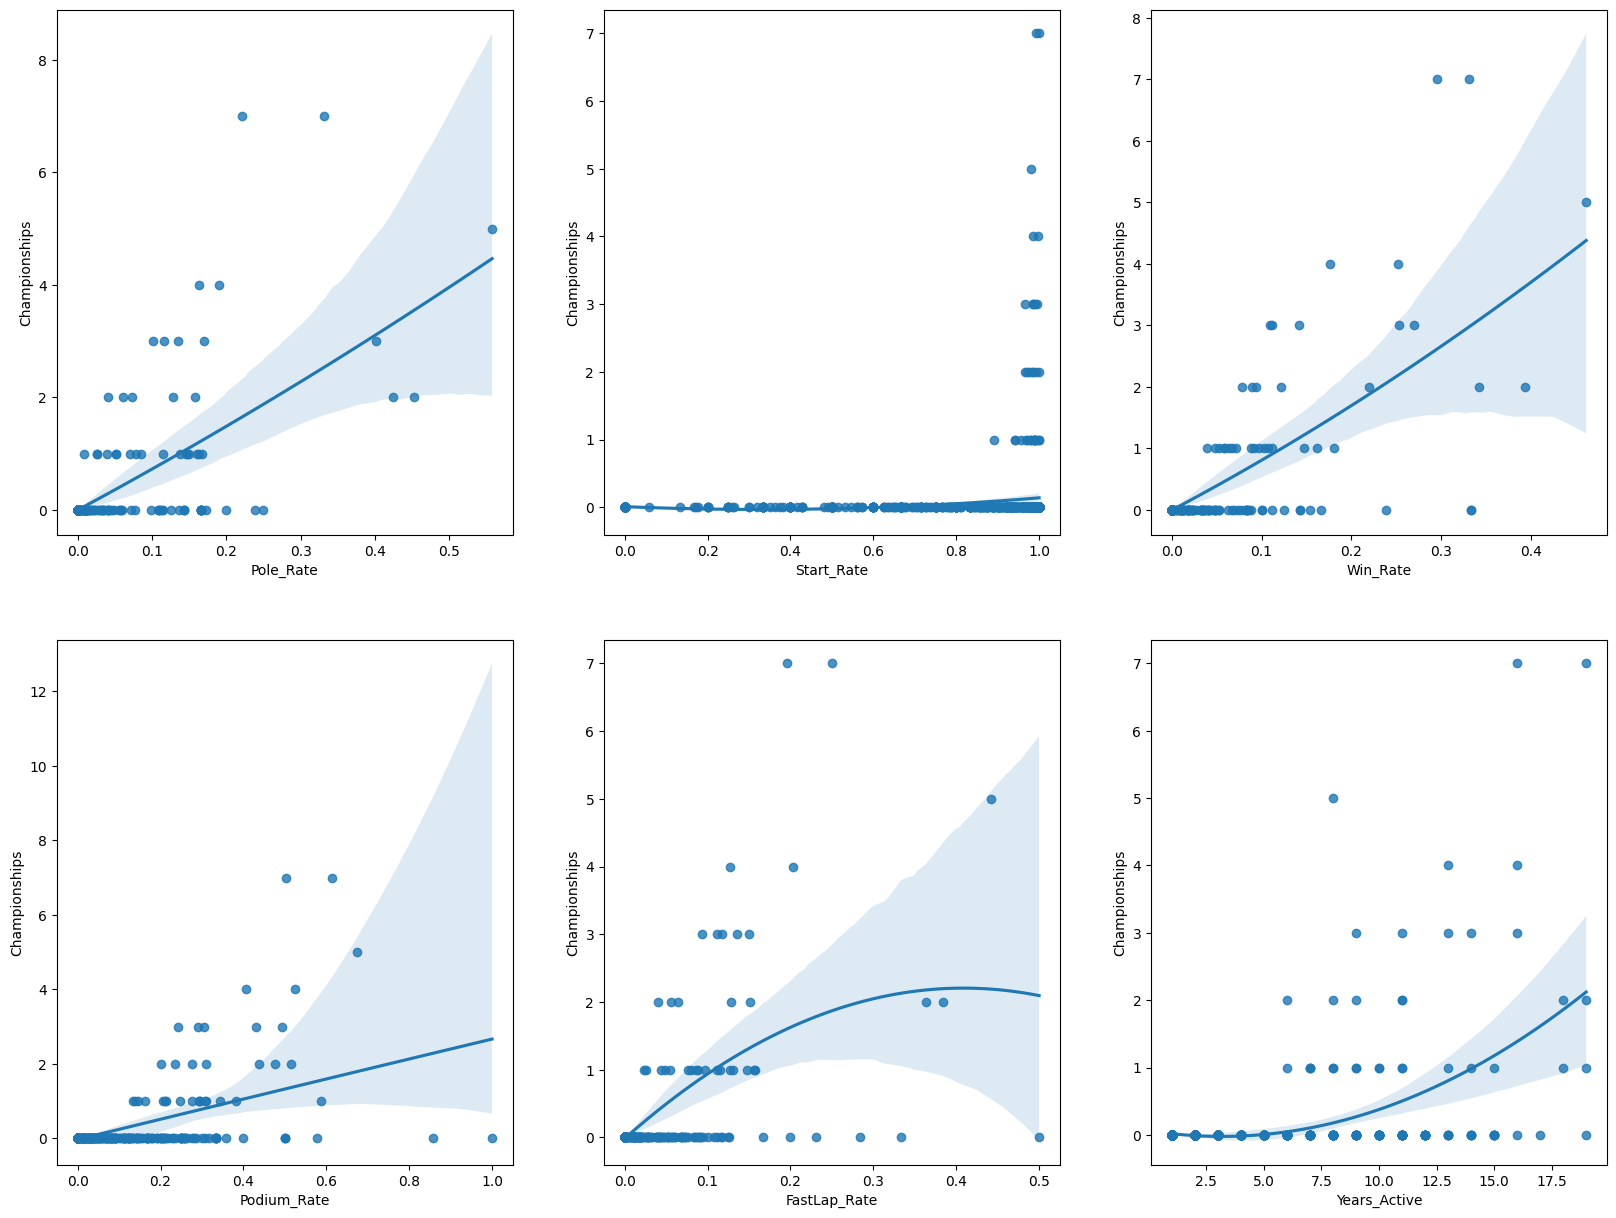

In [ ]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(championship_features, start=1):
    plt.subplot(2, 3, i)
    sns.regplot(x=feature, y='Championships', data=file, order=2)
plt.show()

In [ ]:
target_column = file['Champion']
predictor_columns = file[['Race_Entries', 'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps', 'Points']]
X_features = predictor_columns.values
y_target = target_column.values

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Initialize and fit the SGDClassifier
classifier = SGDClassifier(random_state=42)
model = classifier.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy_score}")
print(f"Precision: {precision_score}")

Accuracy: 0.9885057471264368
Precision: 0.9940828402366864


<Axes: >

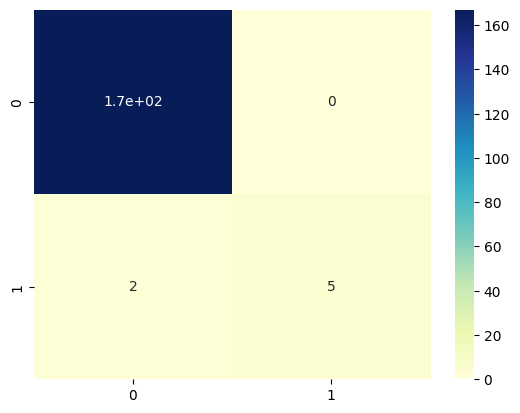

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu')


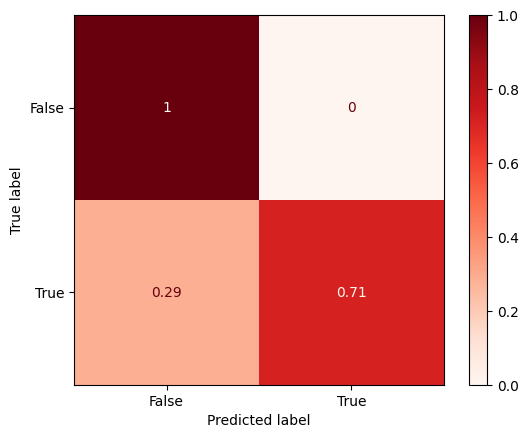

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

The SGDClassifier accurately predicts whether a driver can become a champion based on features like Race Entries, Pole Positions, and Points, with high accuracy and a low false negative rate. While it identifies most champions correctly, F1 race unpredictability prevents us from claiming this as the definitive classification model.